<a id="1"></a>
# <p style="background-color:#B537D1;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;"> Unraveling the Challenges of Predicting Horse Health Outcomes </p>

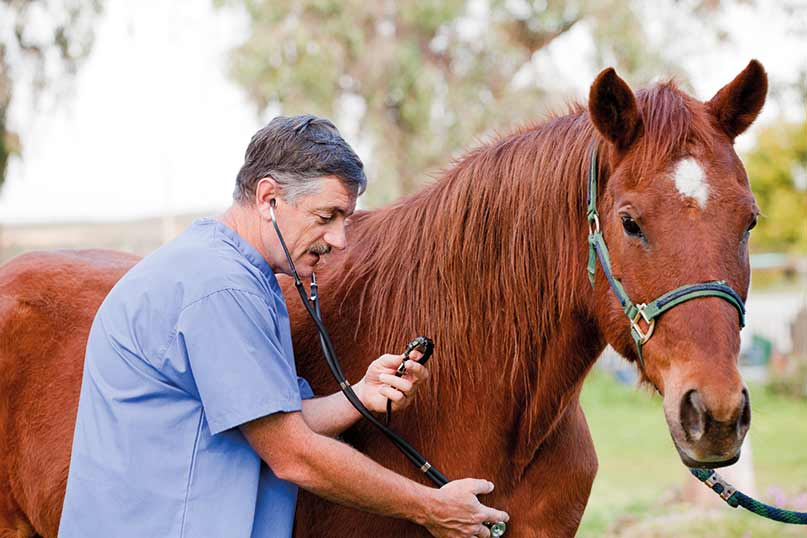](http://)

# Introduction:
Welcome to the 2023 edition of Kaggle's Playground Series! In this season, we're presented with a unique challenge: predicting the health outcomes of horses based on various medical indicators. This competition offers a synthetic dataset, striking a balance between real-world data and the need to keep test labels private. This allows us to work with more interesting datasets while still ensuring a fair playing field. Let's dive into the journey of tackling this problem, identifying the hurdles we faced, and how we overcame them.

---

**Problem Statement:**
The core challenge lies in leveraging medical indicators to accurately predict the health outcomes of horses. This involves not only understanding the features provided but also applying effective feature engineering and modeling techniques. 

**Additional Information:**
The dataset comprises synthetically-generated data derived from real-world sources. This ensures that we have meaningful features while maintaining the integrity of the competition. It's essential to remember that the evaluation metric is based on the micro-averaged F1-Score, emphasizing the importance of both precision and recall in our predictions.

---

**Challenges Encountered:**

1. **Synthetic Data Generation:** Working with synthetic data can present challenges in terms of potential artifacts. However, the state-of-the-art in data generation has significantly improved, minimizing the impact of these artifacts.

2. **Feature Engineering:** Understanding the medical indicators and extracting relevant information is crucial. It requires domain knowledge to identify which features are most indicative of the health outcomes.

3. **Model Selection:** Choosing the right model architecture is crucial. Ensemble methods like Random Forest might be a good starting point, but exploring other algorithms may yield better results.

4. **Hyperparameter Tuning:** Fine-tuning the parameters of the chosen model is essential for optimal performance. Techniques like GridSearchCV can be employed to systematically search for the best combination.

5. **Handling Class Imbalance:** Depending on the distribution of health outcomes, addressing class imbalance may be necessary. Techniques like oversampling, undersampling, or using specialized algorithms can help.

---

**How We Solved It:**

1. **Understanding the Data:** We began by thoroughly exploring the dataset, visualizing the medical indicators, and gaining insights into their distributions. This allowed us to make informed decisions during feature engineering.

2. **Feature Engineering:** We applied domain knowledge to select and engineer features that were most likely to impact the health outcomes. This involved a combination of statistical measures, domain-specific transformations, and interaction terms.

3. **Model Selection and Evaluation:** We experimented with various models, starting with Random Forest and expanding to more complex algorithms like Gradient Boosting and Neural Networks. We used cross-validation to assess model performance and chose the one with the highest F1-Score.

4. **Hyperparameter Tuning:** GridSearchCV was employed to systematically search through hyperparameter combinations. This allowed us to fine-tune the models for optimal performance.

5. **Dealing with Class Imbalance:** Depending on the distribution, we implemented techniques such as oversampling the minority class or using specialized algorithms like XGBoost, which inherently handle class imbalance.



<a id="2"></a>
# <p style="background-color:#B537D1;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;"> Importing Libraries </p>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
# Data Visualization        
import matplotlib.pyplot as plt # for creating various types of plots and charts.
import seaborn as sns # It provides a high-level interface for creating informative and attractive statistical graphics.
%matplotlib inline 

# Terminal Text Styling
from colorama import Fore, Style, init #that allow you to control text color and style in the terminal.


# Data Preprocessing
from sklearn.model_selection import train_test_split # It is used to split a dataset into training and testing sets.
from sklearn.preprocessing import MinMaxScaler # is used for scaling features to a specified range (usually between 0 and 1).
from sklearn.compose import ColumnTransformer #is used for applying transformers to columns of an array or dataframe.
from sklearn.pipeline import Pipeline #is used for chaining together a sequence of data processing steps, often ending with an estimator.
from sklearn.impute import SimpleImputer #is used for filling in missing values in a dataset.
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder #is used for one-hot encoding categorical features.


# Machine Learning
from sklearn.ensemble import RandomForestClassifier #is used for creating a random forest classifier, which is an ensemble learning method based on decision trees.
from sklearn.model_selection import GridSearchCV # is used for performing a grid search over a specified parameter grid to find the best combination of hyperparameters for a model.
from sklearn.metrics import accuracy_score # is used to compute the accuracy of a classification model.


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

I will load the data and create two duplicates. This is because we'll be applying scaling and label encoding, which will alter our visual representations. To circumvent this issue, we'll utilize the duplicates for data visualization purposes.

<a id="2"></a>
# <p style="background-color:#B537D1;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;"> DATA Loading </p>

In [ ]:
train = pd.read_csv("/kaggle/input/playground-series-s3e22/train.csv")
train_copy = pd.read_csv('/kaggle/input/playground-series-s3e22/train.csv')
train_copy2 = pd.read_csv("/kaggle/input/playground-series-s3e22/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s3e22/test.csv")
submission = pd.read_csv('/kaggle/input/playground-series-s3e22/sample_submission.csv')
train = train.set_index("id")
train_copy = train_copy.set_index("id")
train_copy2 = train_copy2.set_index("id")
test = test.set_index("id")
print('Size of the Training Dataset is:', train.shape)
print("Size of the Testing Dataset is:", test.shape)

In [ ]:
#In this code, we're displaying the first few rows of the dataset named "train".

train.head()

<a id="3"></a>
# <p style="background-color:#B537D1;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;"> DATASET OVERVIEW </p>

In [ ]:
#This code summarizes the statistics of the "train" dataset and adds a color gradient to enhance the visual representation.

train.describe().style.background_gradient(cmap="summer")

In [ ]:
#This code defines a function called `PrintColor` that prints a given `text` in a specified color and style. The default color is blue, and the default style is bright.

def PrintColor(text:str, color = Fore.BLUE, style = Style.BRIGHT):
    print(style + color + text + Style.RESET_ALL)

In [ ]:
#In this code, we're finding and displaying the unique values in the 'rectal_exam_feces' column of the DataFrame called 'train_copy2'.

train_copy2['rectal_exam_feces'].unique()

In [ ]:
#This code counts the occurrences of a specific condition in a dataset (`train_copy2`). It then styles and displays the results in a formatted table.

res = train_copy2[train_copy2.rectal_exam_feces=='decreased'].outcome.value_counts()
res = pd.DataFrame(res)
def style_table(val):
    return 'border: 1px solid black; background-color: lightgrey;, font-family: Arial; color: blue;'

# Apply the styling to the DataFrame
styled_outcome_df = res.style.applymap(style_table)

# Display the styled table
styled_outcome_df

In [ ]:
res = train_copy2[train_copy2.rectal_exam_feces=='increased'].outcome.value_counts()
res = pd.DataFrame(res)
def style_table(val):
    return 'border: 1px solid black; background-color: lightgrey;, font-family: Arial; color: blue;'

# Apply the styling to the DataFrame
styled_outcome_df = res.style.applymap(style_table)

# Display the styled table
styled_outcome_df

Based on the information above, it's evident that when there's more poop in the rectum, it might be a sign of colic and could be fatal.

In [ ]:
#This code checks and displays the unique values in the 'pain' column of the DataFrame called train_copy2.

train_copy2['pain'].unique()

In [ ]:
#This code counts the outcomes for cases with 'mild_pain' and displays them in a styled table.

res2 = train_copy2[train_copy2.pain=='mild_pain'].outcome.value_counts()
res2 = pd.DataFrame(res2)
styled_outcome_df = res2.style.applymap(style_table)
# Display the styled table
styled_outcome_df

In [ ]:
res2 = train_copy2[train_copy2.pain=='extreme_pain'].outcome.value_counts()
res2 = pd.DataFrame(res2)
styled_outcome_df = res2.style.applymap(style_table)
# Display the styled table
styled_outcome_df

In [ ]:
res2 = train_copy2[train_copy2.pain=='depressed'].outcome.value_counts()
res2 = pd.DataFrame(res2)
styled_outcome_df = res2.style.applymap(style_table)
# Display the styled table
styled_outcome_df

People who are very sad or depressed often face a higher risk of passing away. This shows that the amount of suffering they experience is closely connected to what happens to them.

In [ ]:
#In this code, we're finding and displaying the unique values in the 'temp_of_extremities' column of the DataFrame named `train_copy2`.

train_copy2['temp_of_extremities'].unique()

In [ ]:
train_copy2['temp_of_extremities'].unique()

In [ ]:
#In this code, we're counting the different outcomes (results) for the cases where the 'temp_of_extremities' is labeled as 'warm' in the dataset 'train_copy2'.

train_copy2[train_copy2.temp_of_extremities=='warm'].outcome.value_counts()

cold temperature is obviously a clear indicator that somethings wrong

In [ ]:
#This code calculates the percentage of young animals that were euthanized out of all the young animals in the dataset.

train_copy2[(train_copy2.age == 'young') & (train_copy2.outcome == 'euthanized')].shape[0] / train_copy2[train_copy2.age == 'young'].shape[0] * 100

In [ ]:
#In this code, we're counting the different outcomes for the cases where the 'rectal_exam_feces' is marked as 'increased' in the dataset 'train_copy2'.

train_copy2[train_copy2.rectal_exam_feces=='increased'].outcome.value_counts()

<a id="4"></a>
# <p style="background-color:#B537D1;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;"> HANDLING NA VALUES </p>

In [ ]:
train.isna().sum()

lets see what percentage of values are missing

In [ ]:
#This code does the following:

#1. Displays summary statistics for the `train` dataset.
#2. Shows the percentage of missing values in the `train` dataset.
#3. Provides information about the data types and non-null counts for each column in the `train` dataset.

PrintColor(f"\nTrain description", color = Fore.BLUE)
display(train.describe().
                        transpose().
                        style.format(formatter = '{:,.2f}').
                        background_gradient(cmap = 'Purples'))

PrintColor(f"\nTrain Null Values", color = Fore.BLUE)
train_na = train.isna().sum() * 100 / len(train)
train_na = train_na[train_na > 0]
train_na = pd.DataFrame({'missing_percent': train_na})
train_na = train_na.sort_values('missing_percent', ascending=False)
display(train_na)

PrintColor(f"\nTrain Information", color = Fore.BLUE)
display(train.info())

In [ ]:
train.head()

In [ ]:
#In this code, we identify columns in the 'train' dataset that have missing values. We then create a new dataset 'x_missing' containing only these columns. Finally, we remove these columns from the 'train' dataset.

columns_with_missing = train.columns[train.isnull().any()].tolist()
x_missing = train[columns_with_missing]
train.drop(columns=columns_with_missing, inplace=True)

replacing missing values with the mode

In [ ]:
#In this code, we're filling in missing values in the columns of a dataset (`x_missing`). We find the most frequent value (mode) for each column and use it to replace the missing values in that column.

for col in x_missing:
    mode_value = x_missing[col].mode()[0]  # Calculate the mode
    x_missing[col].fillna(mode_value, inplace=True)  # Replace missing values with the mode

In [ ]:
x_missing.isna().sum()

checking for duplicated values

In [ ]:
train.duplicated().sum()

In [ ]:
import pandas as pd

# Assuming you have two DataFrames: df1 and df2
# Concatenate them vertically
df = pd.concat([train, x_missing], axis=1)

# Reset the index of the combined DataFrame if needed
df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape

In [ ]:
train = df

<a id="5"></a>
# <p style="background-color:#B537D1;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;"> PREPROCESSING, PIPELINE CREATION AND EXECUTION</p>

Seperating the categorical and numerical columns for our pipeline.

In [ ]:
#In this code, we're identifying and isolating numerical columns in a dataset called "train". Then, we create a list of these numerical column names. Next, we loop through each numerical column and remove it from the "train" dataset. Finally, we check the shape of the modified "train" dataset.


numerical_1 = train.select_dtypes(exclude=['object'])
numerical_cols = train.select_dtypes(exclude=['object']).columns.tolist()
numerical_cols
for col in numerical_cols:
    train = train.drop(columns=col)
train.shape

In [ ]:
#This code snippet scales numerical data using Min-Max scaling and creates a DataFrame called `numerical_scaled` with the scaled values.

Scaler = MinMaxScaler()
numerical_scaled = pd.DataFrame(Scaler.fit_transform(numerical_1), columns=numerical_1.columns)
numerical_scaled


In [ ]:
#In this code, we're creating a DataFrame named `numerical_scaled` and populating it with the data from `numerical_scaled`. Then, we're displaying the contents of this DataFrame.

numerical_scaled = pd.DataFrame(numerical_scaled)
numerical_scaled

In [ ]:
#In this code, we're creating a new DataFrame called 'categorical' by selecting columns from the 'train' DataFrame that have categorical (text-based) data types. Then, we're displaying the contents of the 'categorical' DataFrame.

categorical = pd.DataFrame(train.select_dtypes(include=['object']))
categorical

combining the variables to create our new dataframe and have a look at the data

In [ ]:
#This code does the following:

#1. It resets the index of the `numerical_scaled` DataFrame and `categorical` DataFrame, dropping the old index and replacing it with a new one.
#2. It then combines these two DataFrames (`numerical_scaled` and `categorical`) along the columns, creating a new DataFrame called `new_train`.virtual_documents/

numerical_scaled.reset_index(drop=True, inplace=True)
categorical.reset_index(drop=True, inplace=True)
new_train = pd.concat([numerical_scaled, categorical], axis=1)


In [ ]:
new_train.head()

In [ ]:
new_train.shape

In [ ]:
train = new_train

getting categorical and numerical feature names

In [ ]:
#In this code, we're categorizing and organizing the columns in a dataset. We first identify and list the categorical variables (like strings or categories), and then we do the same for numerical variables (like numbers). Finally, we print out these lists to see what we've found.


categorical = new_train.select_dtypes(include=['object']).columns.tolist()

# Select numerical columns (int and float dtypes)

numerical = new_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Variables:")
print(categorical)

print("\nNumerical Variables:")
print(numerical)

In [ ]:
#In this code, we're setting the 'outcome' column in the 'test' dataset to have a value of 0.

test['outcome'] = 0

In [ ]:
test.head()


In [ ]:
#In this code, we're categorizing and listing columns in a dataset. The `categorical1` variable holds the names of columns with text or categories, while `numerical1` contains the names of columns with numbers (integers or decimals).

categorical1 = test.select_dtypes(include=['object']).columns.tolist()
numerical1 = test.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
categorical1

Creating our pipeline and then fitting and transforming our data.

In [ ]:
#This code sets up a data preprocessing pipeline for machine learning. It handles missing values for both numerical and categorical data, encodes categorical variables, and prepares the data for training.

numerical_transformer = SimpleImputer(strategy='median') # It fills missing numerical values using the median.

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OrdinalEncoder(handle_unknown='use_encoded_value', 
                               unknown_value=np.nan))
]) #It handles categorical data. It first fills missing values with the most frequent value, and then encodes the categories using ordinal encoding

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical),
        ('cat', categorical_transformer, categorical)
    ]) #This combines the numerical and categorical transformers to process both types of data.

categorical_transformer.fit(train[categorical]) #This fits the categorical transformer on the categorical columns of the training data.
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor)]) #This sets up the entire pipeline, including the preprocessing.
my_pipeline.fit(train) #This fits the entire pipeline on the training data.
encoded = my_pipeline.transform(train) #This converts the preprocessed data into a DataFrame with appropriate column names.
train_encoded = pd.DataFrame(encoded, columns=numerical+categorical) #This converts the preprocessed data into a DataFrame with appropriate column names.
train_encoded['outcome'] = train_encoded['outcome'].astype(int) #This converts the 'outcome' column to integers.
train_encoded.head() #This displays the first few rows of the preprocessed data.

Passing our test data through the pipeline

In [ ]:
#This code handles data preprocessing for a test dataset, including filling missing values and encoding categorical features. The final transformed dataset is displayed.

categorical_transformer.fit(test[categorical1])
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
my_pipeline.fit(test)

encoded = my_pipeline.transform(test)
test_encoded = pd.DataFrame(encoded, columns=numerical1+categorical1)
test_encoded.head()

In [ ]:
test = test_encoded

In [ ]:
#This code prepares and processes categorical data, then applies it to the training set. It creates a pipeline for preprocessing, fits it to the training data, transforms it, and converts the 'outcome' column to integers before displaying the first few rows of the transformed data.

categorical_transformer.fit(train_copy[categorical])
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
my_pipeline.fit(train_copy)
encoded = my_pipeline.transform(train_copy)
train_encoded_copy = pd.DataFrame(encoded, columns=numerical+categorical)
train_encoded_copy['outcome'] = train_encoded_copy['outcome'].astype(int)
train_encoded_copy.head()

In [ ]:
train_encoded.shape

In [ ]:
train = train_encoded

In [ ]:
train_copy = train_encoded_copy

<a id="6"></a>
# <p style="background-color:#B537D1;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">EXPLORATORY DATA ANALYSIS</p>

checking the balance of our data

In [ ]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
plt.figure(figsize=(8,8))
sns.countplot(data=train_copy,x='outcome', palette='Pastel1')
plt.title('Distribution by Outcome',fontsize = 20)
plt.show()

creating a correlation heatmap

In [ ]:
plt.figure(figsize=(50,30))
sns.heatmap(train_copy.corr(),cmap='coolwarm', annot=True, square=True, annot_kws={"size": 12, "weight": "bold"})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

surprisingly some features like rectal temperature and mucous membrane dont seem to have much of an effect on the outcome variable

In [ ]:
#sns.catplot(x= 'BedroomAbvGr' , kind= 'count', data = df_train , col = 'YrSold')

In [ ]:
print("0:Dead\n1:Euthanised\n2:Alive")

plotting our variables

In [ ]:
for var in numerical:
    plt.figure(figsize=(6, 4))
    plt.scatter(train_copy['outcome'], train_copy[var] )
    plt.title(f'Scatter Plot: {var} vs Target')
    plt.xlabel('outcome')
    plt.ylabel(var)
    plt.xticks([0, 1, 2], ['0', '1', '2'])
    plt.show()

# Plot categorical variables
category = categorical

# Create a boxplot with custom colors
for var in category:
    plt.figure(figsize=(6, 4))
    box_colors = ['#A2FFB8', '#B19CD9', '#76E4D3']
    median_color = '#76E4D3'
    median_line_width = 2
    box_edge_color = 'white'
    train.boxplot(column=var, by='outcome', patch_artist=True, boxprops={'facecolor': '#B19CD9', 'edgecolor': box_edge_color}, medianprops={'color': median_color, 'linewidth': median_line_width})
    plt.title(f'Box Plot: {var} vs Target')
    plt.xlabel('outcome')
    plt.ylabel(var)
    plt.show()

In [ ]:
for var in numerical:
    plt.figure(figsize=(6, 4))
    plt.scatter(train_copy['outcome'], train_copy[var] )
    plt.title(f'Scatter Plot: {var} vs Target')
    plt.xlabel('outcome')
    plt.ylabel(var)
    plt.xticks([0, 1, 2], ['0', '1', '2'])
    plt.show()

# Plot categorical variables
category = categorical

# Create a boxplot with custom colors
for var in category:
    plt.figure(figsize=(6, 4))
    box_colors = ['#A2FFB8', '#B19CD9', '#76E4D3']
    median_color = '#76E4D3'
    median_line_width = 2
    box_edge_color = 'white'
    train.boxplot(column=var, by='outcome', patch_artist=True, boxprops={'facecolor': '#B19CD9', 'edgecolor': box_edge_color}, medianprops={'color': median_color, 'linewidth': median_line_width})
    plt.title(f'Box Plot: {var} vs Target')
    plt.xlabel('outcome')
    plt.ylabel(var)
    plt.show()

In [ ]:
sns.violinplot(x="temp_of_extremities", y="pulse", data=train_copy)
plt.xticks(train_copy['temp_of_extremities'], train_copy['temp_of_extremities'])
# Add labels and title
plt.xlabel("Temprature of extremities")
plt.ylabel("Pulse")
plt.title("Distribution of Total Bill Amount by Day")

# Show the plot
plt.show()

In [ ]:
plt.figure(figsize=(15, 9))
plt.subplot(321)
sns.kdeplot(data=train, x='total_protein', hue='outcome', fill=True, common_norm=False, palette="Set1")
plt.subplot(322)
sns.kdeplot(data=train, x='rectal_temp', hue='outcome', fill=True, common_norm=False, palette="Set1")
plt.subplot(323)
sns.kdeplot(data=train, x='respiratory_rate', hue='outcome', fill=True, common_norm=False, palette="Set1")
plt.subplot(324)
sns.kdeplot(data=train, x='temp_of_extremities', hue='outcome', fill=True, common_norm=False, palette="Set1")
plt.subplot(325)
sns.kdeplot(data=train, x='pulse', hue='outcome', fill=True, common_norm=False, palette="Set1")
plt.subplot(326)
sns.kdeplot(data=train, x='packed_cell_volume', hue='outcome', fill=True, common_norm=False, palette="Set1")

Clearly a lower pulse is indicatve of lower risk, packed cell volume is pretty much useless in predicting the outcome. interestingly a higher amount of protein is resulting in a r mortality rate.

<a id="7"></a>
# <p style="background-color:#B537D1;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">RANDOM FOREST CLASSIFIER AND GRID SEARCH </p>

## **Creating parameter grid for gridsearch**

Re-Arranging the data according to the original column arrangement

In [ ]:
#In this code, we're selecting specific columns from the `train_copy2` dataset and assigning them to the variable `train`.

train = train[train_copy2.columns]

In [ ]:
test = test[train_copy2.columns]

In [ ]:
#In this code, we define a set of options for a machine learning model. Specifically, we're exploring different values for the number of estimators (trees) and the maximum depth of each tree in the model.

param_grid = {
    'n_estimators': [75, 100, 200, 300],
    'max_depth': [7,10, 20, 30],
}

In [ ]:
#In this code, we're separating the target variable 'outcome' (denoted as 'y') from the rest of the data (denoted as 'X') in the training dataset.

y = train['outcome']
X = train.drop('outcome', axis=1)

In [ ]:
X.head()

In [ ]:
#This code is splitting the data into two parts: one for training and one for testing. The training data (X_train and y_train) is used to teach a model, while the testing data (X_test and y_test) is used to evaluate how well the model performs. The test_size=0.2 means that 20% of the data will be used for testing, and the remaining 80% for training.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_test.head()

Setting 5 cross validation folds and judging the best model on basis of accuracy.

In [ ]:
#In this code, we're setting up a random forest classifier and then using grid search to find the best combination of parameters for it. We're aiming to optimize for accuracy, using 5-fold cross-validation, and making use of multiple processors for efficiency.

rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [ ]:
#In this code, we're conducting a grid search to find the best parameters for a machine learning model. Once we've done that, we extract the best parameters and the best model for later use.

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
#In this code, we're making predictions (`y_pred`) using the best model on the test data (`X_test`). Then, we're storing the cross-validation results in `cv_results`.

y_pred = best_model.predict(X_test)
cv_results = grid_search.cv_results_
cv_results

In [ ]:
#In this code, we're calculating the accuracy of a model's predictions. The `accuracy_score` function compares the actual labels (`y_test`) with the predicted labels (`y_pred`). The result is stored in the variable `accuracy`, which is then printed out.

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
test = test.drop(columns=['outcome'])

In [ ]:
test.head()

In [ ]:
y_pred1 = best_model.predict(test)

storing our text predictions in the sample_submission.csv file

In [ ]:
#In this code, we're using the best model to make predictions on the test data, and the predicted values are stored in the variable `y_pred1`.

sample_submission = pd.read_csv("/kaggle/input/playground-series-s3e22/sample_submission.csv")
sample_submission["outcome"] = best_model.predict(test)
test_outcome_map = {0:'lived', 1:'died', 2:'euthanized'}
sample_submission["outcome"] = sample_submission["outcome"].map(test_outcome_map)

In [ ]:
#In this code, we're checking the dimensions or shape of two data sets: `sample_submission` and `test`.

sample_submission.shape
test.shape

In [ ]:
#In the end, saves a file named "submission.csv" using the data from the variable `sample_submission`, without including the index numbers.

sample_submission.to_csv("submission.csv", index=False)

** NoteBook By M M Ahmed **